## Dependencies

In [25]:
# Filepaths, Python Imaging,, numpy and panas 
import os
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

### Load the Plant Disease dataset from local desktop

In [3]:
base_dir = r'ENTER YOUR FILE PATH HERE'

In [15]:
# TESTING: Initial for loop developed to pull 1500 images from healthy and 175 from all others for even split of healthy vs unhealthy logistic regression
# def load_images_from_subfolders(base_folder):
#    images = []
#    labels = []
#    max_images_healthy = 1500
#    max_images_others = 175

#    for root, dirs, files in os.walk(base_folder):
#        folder_name = os.path.basename(root)
#        if folder_name.startswith("Tomato_"):
#            image_count = 0 
#            if folder_name == "Tomato_healthy":
#               max_images = max_images_healthy
#            else:
#                max_images = max_images_others

#            for file in files:
#                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
#                    if image_count >= max_images:
#                        break
#                    img_path = os.path.join(root, file)
#                    print(f"Loading {img_path}")
#                    try:
#                        img = Image.open(img_path).convert('RGB')
#                        img = img.resize((28, 28))
#                        images.append(np.array(img))
#                        labels.append(folder_name) 
#                        image_count += 1
#                    except Exception as e:
#                        print(f"Error loading image {img_path}: {e}")

#    return np.array(images), np.array(labels)

#all_images, labels = load_images_from_subfolders(base_dir)
#print(f'Total number of images: {all_images.shape[0]}')

# Collect all images & preprocessing

In [46]:
# Expanding for loop to gather all images from all directories
def load_images_from_subfolders(base_folder):
    images = []
    labels = []

    for root, dirs, files in os.walk(base_folder):
        folder_name = os.path.basename(root)

        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                print(f"Loading {img_path}")
                try:
                   img = Image.open(img_path).convert('RGB')
                    img = img.resize((28, 28))
                    images.append(np.array(img))
                    labels.append(folder_name) 
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    return np.array(images), np.array(labels)

all_images, labels = load_images_from_subfolders(base_dir)
print(f'Total number of images: {all_images.shape[0]}')

In [5]:
# Normalizing all images using fit_transform
n_samples, height, width, n_channels = all_images.shape
flattened_images = all_images.reshape((n_samples, -1))

scaler = MinMaxScaler()
flattened_images_scaled = scaler.fit_transform(flattened_images)

# Create dataframe from scaled and flattened images
df_scaled_images = pd.DataFrame(flattened_images_scaled)

# Add Label (i.e. Category) to the dataframe
df_scaled_images['label'] = labels

# Save dataframe to CSV locally due to size
file_path = r'ENTER YOUR FILE PATH HERE'
df_scaled_images.to_csv(file_path, index=False)

# Review normalized images

In [14]:
# Review the dataframe
df_scaled_images.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,0.500000,0.440945,0.452756,0.507874,0.448819,0.460630,0.517647,0.458824,0.470588,0.513725,...,0.637795,0.592157,0.628458,0.633858,0.586614,0.624506,0.647059,0.596078,0.633858,Pepper__bell___Bacterial_spot
1,0.555118,0.500000,0.586614,0.566929,0.511811,0.598425,0.568627,0.513725,0.611765,0.576471,...,0.555118,0.486275,0.565217,0.559055,0.496063,0.581028,0.560784,0.501961,0.590551,Pepper__bell___Bacterial_spot
2,0.200787,0.177165,0.224409,0.035433,0.043307,0.043307,0.274510,0.247059,0.227451,0.552941,...,0.767717,0.729412,0.802372,0.771654,0.736220,0.806324,0.776471,0.741176,0.811024,Pepper__bell___Bacterial_spot
3,0.027559,0.023622,0.043307,0.267717,0.228346,0.291339,0.415686,0.349020,0.423529,0.509804,...,0.653543,0.592157,0.687747,0.622047,0.566929,0.660079,0.627451,0.572549,0.665354,Pepper__bell___Bacterial_spot
4,0.688976,0.649606,0.653543,0.700787,0.661417,0.665354,0.666667,0.619608,0.627451,0.666667,...,0.480315,0.419608,0.434783,0.488189,0.429134,0.442688,0.466667,0.407843,0.421260,Pepper__bell___Bacterial_spot


In [12]:
# Review the shape of the images
df_scaled_images.shape

(41276, 2353)

In [13]:
# Review unique labels
df_scaled_images['label'].unique().tolist()

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [38]:
label_count = df_scaled_images['label'].value_counts().sort_values(ascending=True)
label_count

label
Potato___healthy                                304
Tomato__Tomato_mosaic_virus                     746
Tomato_Leaf_Mold                               1904
Pepper__bell___Bacterial_spot                  1994
Potato___Early_blight                          2000
Potato___Late_blight                           2000
Tomato_Early_blight                            2000
Tomato__Target_Spot                            2808
Pepper__bell___healthy                         2956
Tomato_healthy                                 3182
Tomato_Spider_mites_Two_spotted_spider_mite    3352
Tomato_Septoria_leaf_spot                      3542
Tomato_Late_blight                             3818
Tomato_Bacterial_spot                          4254
Tomato__Tomato_YellowLeaf__Curl_Virus          6416
Name: count, dtype: int64

# Visualize images by disease

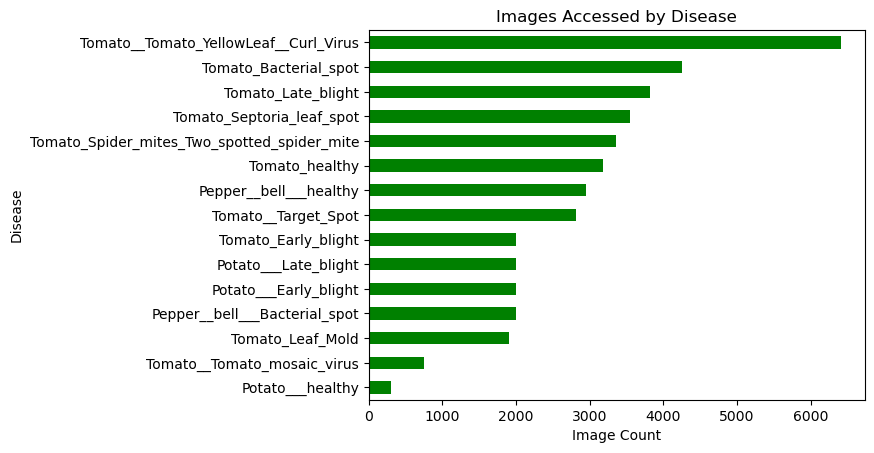

In [45]:
import matplotlib.pyplot as plt
label_count.plot(kind='barh', color='green')
plt.title('Images Accessed by Disease')
plt.xlabel('Image Count')
plt.ylabel('Disease')
plt.savefig('..\Output\images_accessed_by_disease.png',  dpi=300, bbox_inches='tight')
plt.show()